FileUpload(value={}, accept='.csv', description='Upload')

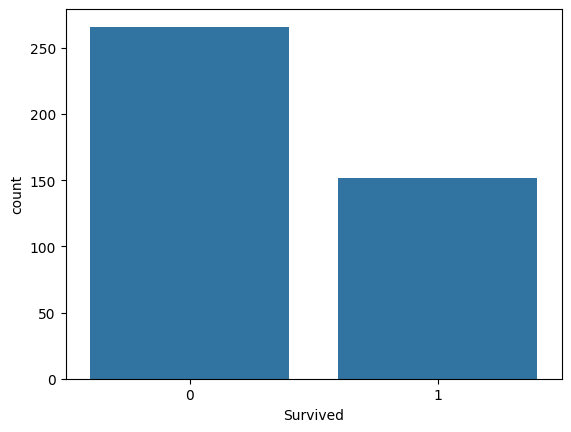

Error reading the file: could not convert string to float: 'de Brito, Mr. Jose Joaquim'


In [11]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def handle_upload(change):
    uploaded_filename = next(iter(uploader.value))
    content = uploader.value[uploaded_filename]['content']

    try:
        data = pd.read_csv(io.BytesIO(content))

        # Exploratory Data Analysis (basic example)
        sns.countplot(x='Survived', data=data)
        plt.show()

        # Data Preprocessing (basic example)
        data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

        # Model Building and Training
        X = data.drop('Survived', axis=1)
        y = data['Survived']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Model Evaluation
        accuracy = model.score(X_test, y_test)
        print("Accuracy:", accuracy)

    except Exception as e:
        print("Error reading the file:", e)

# Create the upload button
uploader = widgets.FileUpload(
    accept='.csv',
    multiple=False
)

display(uploader)

uploader.observe(handle_upload, names='value')
